In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import warnings
import seaborn as sns
import scipy.stats as st
import datetime

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20, 10

# **Задание 1**

Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [111]:
!wget -O test1_1.csv  https://drive.google.com/u/0/uc?id=1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW&export=download
!pip install fitter

--2020-04-08 18:43:14--  https://drive.google.com/u/0/uc?id=1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW
Resolving drive.google.com (drive.google.com)... 172.217.204.139, 172.217.204.102, 172.217.204.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/edkdrkaqa9u2cjfo2gp9d81u05ba44ne/1586371350000/08786162772281847194/*/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW [following]
--2020-04-08 18:43:14--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/edkdrkaqa9u2cjfo2gp9d81u05ba44ne/1586371350000/08786162772281847194/*/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.co

In [147]:
test_1 = pd.read_csv('test1_1.csv', sep=';', index_col=0)
test_1

,metrics
1,1
2,1
3,4
4,1
5,1
...,...
306835,8
306836,11
306837,1
306838,81


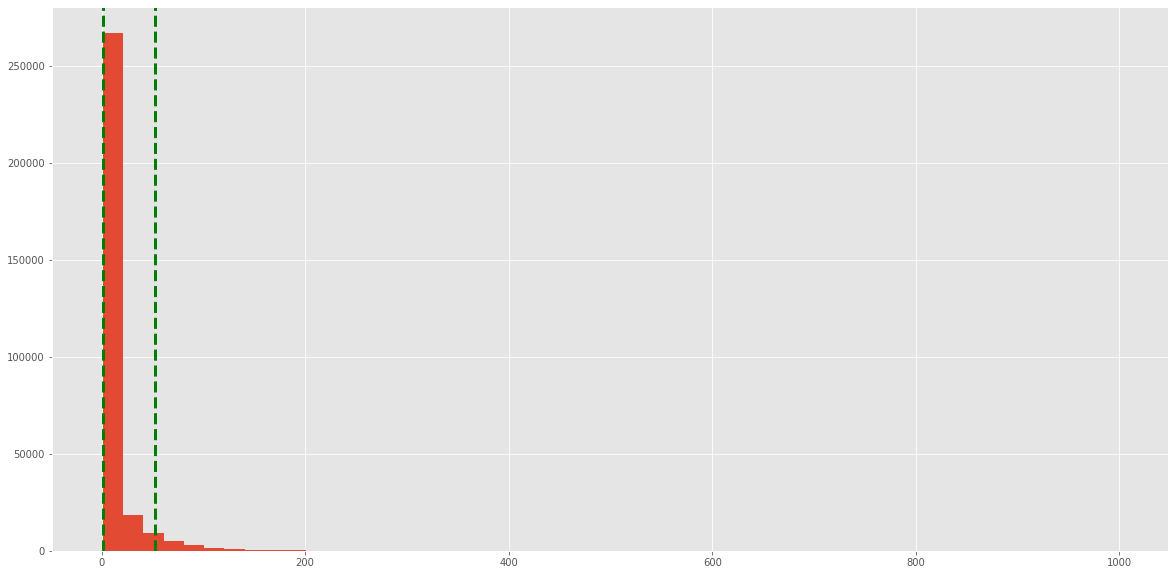

In [0]:
plt.hist([test_1["metrics"].values], bins=50);
q_005, q_095 = mquantiles(test_1["metrics"].values, [0.05, 0.95])
plt.axvline(x=q_005, linewidth=3, color='g',linestyle='--');
plt.axvline(x=q_095, linewidth=3, color='g',linestyle='--');

In [142]:
prop = len(test_1[(test_1["metrics"] >= q_005) & (test_1["metrics"] <= q_095)]) * 100/len(test_1) 
no_prop = 100 - prop
print("Не входит:", no_prop)

Не входит: 4.987306046493444


-----
Попробуем определить какому закону распределения отвечают данные. Первая ссылка дала тест Колмогорова-Смирнова, немного модифицировав его (взяв все непрерывные распределения), я получил, что p-value для всех распределений равно 0 и приуныл. Если хотите воспроизвести уныние, то раскомментируйте код.

In [0]:
# import csv
# from datetime import datetime
# import requests
# from bs4 import BeautifulSoup
# import re

# url = "https://docs.scipy.org/doc/scipy/reference/stats.html"
# response = requests.get(url)
# soup = BeautifulSoup(response.content, 'html5lib')

# #https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1
# all_statistical_functions = soup.findAll('tbody')
# continious_dist = all_statistical_functions[1]
# discrete_dist = all_statistical_functions[3]

# dist_list = []
# for line in continious_dist:
#   if re.search("scipy.stats", str(line)):
#     dist_list.extend(re.findall("generated/scipy\.stats\.(\w*)", str(line)))

# discrete_dist_list = []
# for line in discrete_dist:
#   if re.search("scipy.stats", str(line)):
#      discrete_dist_list.extend(re.findall("generated/scipy\.stats\.(\w*)", str(line)))

# dist_del = ["geninvgauss", "gausshyper", "levy_stable", "nct", "ncf", "ncx2", 'tukeylambda']
# for dist_name in dist_del:
#     dist_list.remove(dist_name)

In [0]:
# def get_best_distribution(data, dist_names, threshold = 120):
#     #https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3/37570540
#     dist_results = []
#     params = {}
#     slow_list = []

#     for dist_name in dist_names:
#         dist = getattr(st, dist_name)
#         start = datetime.datetime.now()
#         param = dist.fit(data)
#         params[dist_name] = param
#         # arg = param[:-2]
#         # loc = param[-2]
#         # scale = param[-1]
#         # # Applying the Kolmogorov-Smirnov test
#         D, p = st.kstest(data, dist_name, args=param, N = len(data))
#         stop = datetime.datetime.now()
#         if (stop - start).seconds > threshold:
#             slow_list.append(dist_name)
#             print(f"Время {dist_name}: ", (stop - start).seconds)

#         print("p value for " + dist_name + " = " + str(p) + ", " + str(D))
#         dist_results.append((dist_name, p))

#     # select the best fitted distribution
#     best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
#     # store the name of the best fit and its p value

#     print("Best fitting distribution: " + str(best_dist))
#     print("Best p value: " + str(best_p))
#     print("Parameters for the best fit: "+ str(params[best_dist]))

#     return best_dist, best_p, params[best_dist], slow_list

In [0]:
# best_dist, best_p, params, slow_list = get_best_distribution(test_1["metrics"].values, dist_list)

--- 
Недолго длилось уныние, поскольку нашлась библиотека [Fitter](https://fitter.readthedocs.io) - ей я и воспользуюсь.

In [0]:
from fitter import Fitter
f = Fitter(test_1["metrics"].values, timeout=200)

In [0]:
f.fit()

Fitted alpha distribution with error=0.0043473201289330925)
Fitted anglit distribution with error=0.006284350201424501)
Fitted arcsine distribution with error=0.005838956302838676)
Fitted argus distribution with error=0.006660678436014504)
Fitted beta distribution with error=0.00415474762909558)
Fitted betaprime distribution with error=0.005320000968614806)
Fitted bradford distribution with error=0.004505902142611562)
Fitted burr distribution with error=0.0041394662319531855)
Fitted burr12 distribution with error=0.006511705273119994)
Fitted cauchy distribution with error=0.004449059611721195)
Fitted chi distribution with error=0.0049766949315851365)
Fitted chi2 distribution with error=0.0024694793861487377)
Fitted cosine distribution with error=0.006279419593892543)
Fitted crystalball distribution with error=0.0042373990488534805)
Fitted dgamma distribution with error=0.00419379459472505)
Fitted dweibull distribution with error=0.0044631671140162345)
Fitted erlang distribution with er

,sumsquare_error,aic,bic,kl_div
pearson3,0.000195,17776.786185,-6.497180e+06,inf
wald,0.000412,8206.488213,-6.268355e+06,inf
gompertz,0.000456,11788.601085,-6.237273e+06,inf
genexpon,0.000512,11354.450273,-6.201665e+06,inf
expon,0.000512,11347.281405,-6.201608e+06,inf


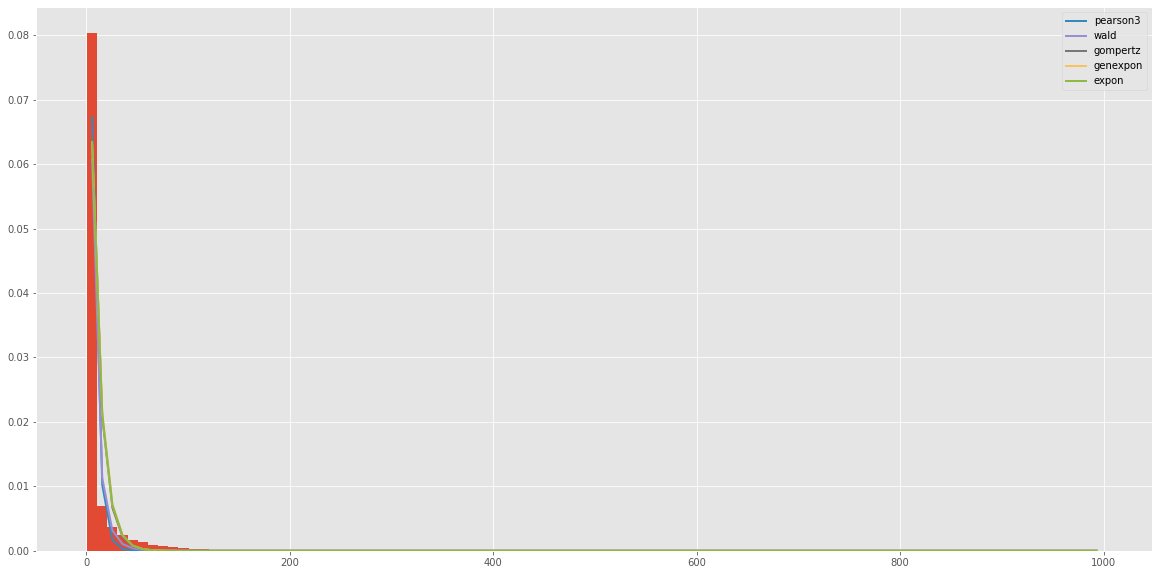

In [0]:
f.summary()

In [0]:
f.get_best()

{'pearson3': (2.16361683268579, 5.930401362739387, 5.333749690159948)}

Получаем такое распределение с параметрами.

# **Задание 2**

Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

In [0]:
!wget -O test_2.csv https://drive.google.com/u/0/uc?id=1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy&export=download

--2020-04-08 16:51:05--  https://drive.google.com/u/0/uc?id=1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy
Resolving drive.google.com (drive.google.com)... 172.217.203.100, 172.217.203.113, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nqcunp8jnff148qe41bdvbat20rv1r6b/1586364600000/08786162772281847194/*/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy [following]
--2020-04-08 16:51:06--  https://doc-0c-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nqcunp8jnff148qe41bdvbat20rv1r6b/1586364600000/08786162772281847194/*/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy
Resolving doc-0c-2o-docs.googleusercontent.com (doc-0c-2o-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0c-2o-docs.googleusercontent.com (doc-0c-2o-docs.googleusercontent.co

### Условия проведения t-test

Пусть необходимо проверить гипотезу о равенстве средних значений в двух независимых выборках. Для этой цели подходит критерий Стьюдента. Но применение критерия Стьюдента обосновано, только если данные подчиняются нормальному распределению. Поэтому перед применением критерия необходимо проверить гипотезу о нормальности исходных данных. Или проверка остатков линейной регрессии на нормальность — позволяет проверить, соответствует ли применяемая модель регрессии исходным данным.

Для применения t-критерия Стьюдента данные должны удовлетворять следующим условиям:

* Гомогенность дисперсий - дисперсии внутри наших групп должны быть приблизительно одинаковыми
* Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)
связные выборки:
* Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

#### Проверка на нормальность
1. [Тест Лиллифорса на нормальность или экспоненциальное распределение.](https://www.statsmodels.org/v0.10.2/generated/statsmodels.stats.diagnostic.lilliefors.html#statsmodels.stats.diagnostic.lilliefors)

Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности. Эта модификация существенна. Для проверки гипотезы нормальности нельзя использовать классический непараметрический критерий Колмогорова-Смирнова

$H_0$: данные были получены из нормального / экспоненциального распределения

$H_A$: данные не были получены из нормального / экспоненциального распределения

* Если значение pvalue ниже некоторого порогового значения, например 0,05, то мы можем отвергнуть нулевую гипотезу о том, что выборка исходит из нормального распределения


2. Тест Шапиро-Уилка

Тест Шапиро-Уилка проверяет нулевую гипотезу о том, что данные были получены из нормального распределения.

$H_0$: данные были получены из нормального распределения

$H_A$: данные не были взяты из нормального распределения

if p_value > 0.05:
* мы не можем отвергнуть нулевую гипотезу о том, что выборка исходит из нормального распределения

еще:
* мы можем отвергнуть нулевую гипотезу о том, что выборка исходит из нормального распределения

3. Тест Андерсона-Дарлинга для данных, поступающих из конкретного распределения.

Тест Андерсон-Дарлинга проверяет нулевую гипотезу о том, что выборка берется из популяции, которая следует определенному распределению. Для критерия Андерсона-Дарлинга критические значения зависят от того, с каким распределением проводится проверка. Эта функция работает для нормального, экспоненциального, логистического, или Гумбеля (экстремальный тип значения I) распределения.

$H_0$: данные были получены из нормального распределения

$H_A$: данные не были взяты из нормального распределения


In [0]:
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from scipy.stats import anderson

In [0]:
test_2 = pd.read_csv("test_2.csv", delimiter=";", index_col=0)
test_2

,variant,metrics
1,A,1
2,B,1
3,A,4
4,B,37
5,B,4
...,...,...
184200,A,12
184201,A,8
184202,B,11
184203,B,81


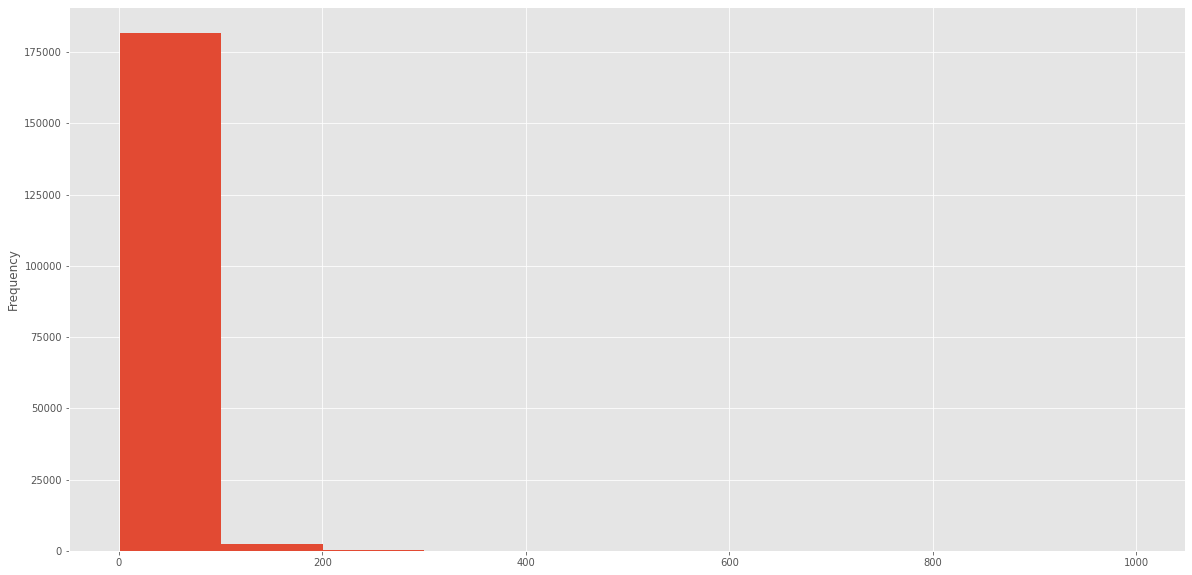

In [0]:
test_2["metrics"].plot(kind="hist");

In [0]:
ksstat_lil, p_value_lil = lilliefors(test_2["metrics"].values)
statistic, crit_values, significance_level = anderson(test_2["metrics"].values, dist='norm')
_, p_value_shapiro = shapiro(test_2["metrics"].values)

In [0]:
for i in range(len(crit_values)):
	sl, cv = significance_level[i], crit_values[i]
	if statistic < crit_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [0]:
alpha = 0.05
if p_value_lil > alpha:
	print('Sample looks Gaussian (fail to reject H0) Lilliefors-test')
else:
	print('Sample does not look Gaussian (reject H0) Lilliefors-test')

Sample does not look Gaussian (reject H0) Lilliefors-test


In [0]:
alpha = 0.05
if p_value_shapiro > alpha:
	print('Sample looks Gaussian (fail to reject H0) Shapiro-Wilk-test')
else:
	print('Sample does not look Gaussian (reject H0) Shapiro-Wilk-test')

Sample does not look Gaussian (reject H0) Shapiro-Wilk-test


Получили, что мы отвергаем гипотезу о нормальности в трех тестах, поэтому применять t-test невозможно. Но если данные проходили по тестам, то нужно было бы проверить на гомогенность дисперсий с помощью критерия Левена (для двух выборок) или с помощью Барлетта.

Тогда используем критерий Манна-Уитни-Вилкоксона - статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.

$H_0$: равенсто медиан распределений ранговых значений

$H_A$: неравенсто медиан распределений ранговых значений

In [0]:
from scipy.stats import mannwhitneyu

In [0]:
group_A = test_2[test_2["variant"] == "A"]["metrics"].values
group_B = test_2[test_2["variant"] == "B"]["metrics"].values

In [0]:
_, pvalue = mannwhitneyu(group_A, group_B)

In [0]:
alpha = 0.05
if pvalue > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Different distribution (reject H0)


Нулевая гипотеза отвергается на выбранном уровне значимости, и различия между выборками признаются статистически значимыми.

# **Задание 3**

Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [0]:
!wget -O test3.csv https://drive.google.com/u/0/uc?id=1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba&export=download

--2020-04-08 16:33:48--  https://drive.google.com/u/0/uc?id=1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba
Resolving drive.google.com (drive.google.com)... 172.217.204.102, 172.217.204.139, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g5ve94ncqliq60qucso5960p626q349c/1586363625000/08786162772281847194/*/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba [following]
--2020-04-08 16:33:48--  https://doc-0k-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g5ve94ncqliq60qucso5960p626q349c/1586363625000/08786162772281847194/*/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba
Resolving doc-0k-2o-docs.googleusercontent.com (doc-0k-2o-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0k-2o-docs.googleusercontent.com (doc-0k-2o-docs.googleusercontent.co

In [0]:
data_3 = pd.read_csv("test3.csv", delimiter=";", index_col=0)
data_3

,variant,metrics
1,A,1
2,A,4
3,A,15
4,A,1
5,A,10
...,...,...
108095,D,1
108096,A,1
108097,A,12
108098,A,8


In [0]:
data_3.groupby(["variant"]).count()

,metrics
variant,
A,92686
D,15413


In [0]:
group_A = data_3[data_3.variant == "A"]
group_B = data_3[data_3.variant == "D"]

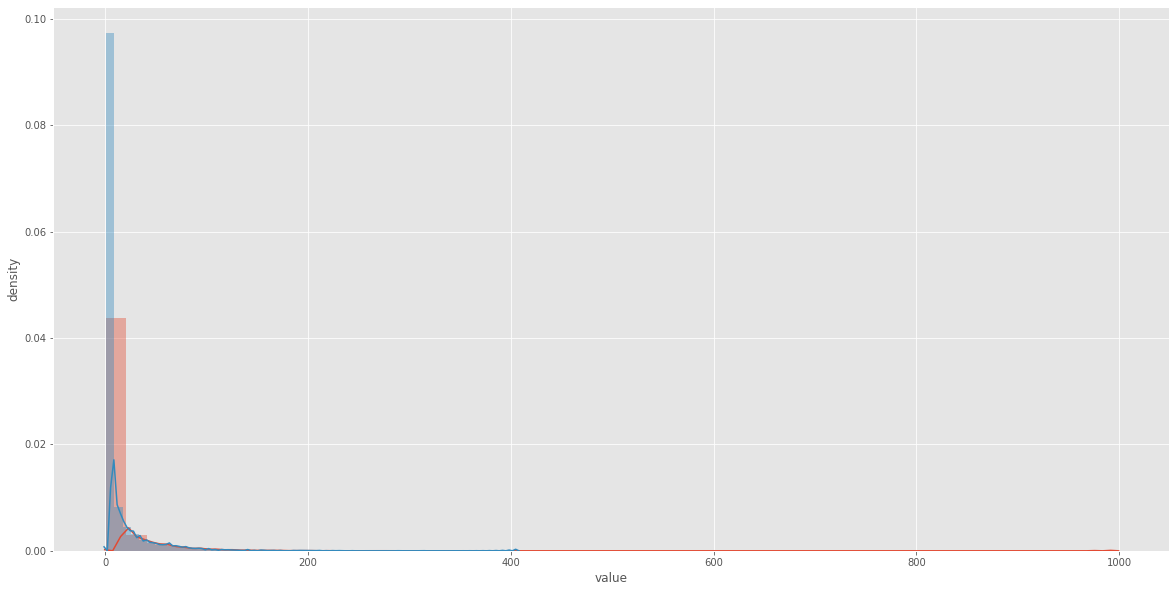

In [0]:
sns.distplot(group_A["metrics"].values, label='A');
sns.distplot(group_B["metrics"].values, label='D');

plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [0]:
def bootstrap(sample, size = 5000, boot = 100000):
    boot_means = []
    for _ in range(boot):
        bootsample = np.random.choice(sample, size=size, replace=True)
        boot_means.append(bootsample.mean())
    return boot_means

In [0]:
boot = 100000
bootmean_A = bootstrap(group_A.metrics.values, boot = boot)
bootmean_B = bootstrap(group_B.metrics.values, boot = boot)

In [0]:
a_q5, a_q95 = np.quantile(bootmean_A, [0.05, 0.95])
b_q5, b_q95 = np.quantile(bootmean_B, [0.05, 0.95])

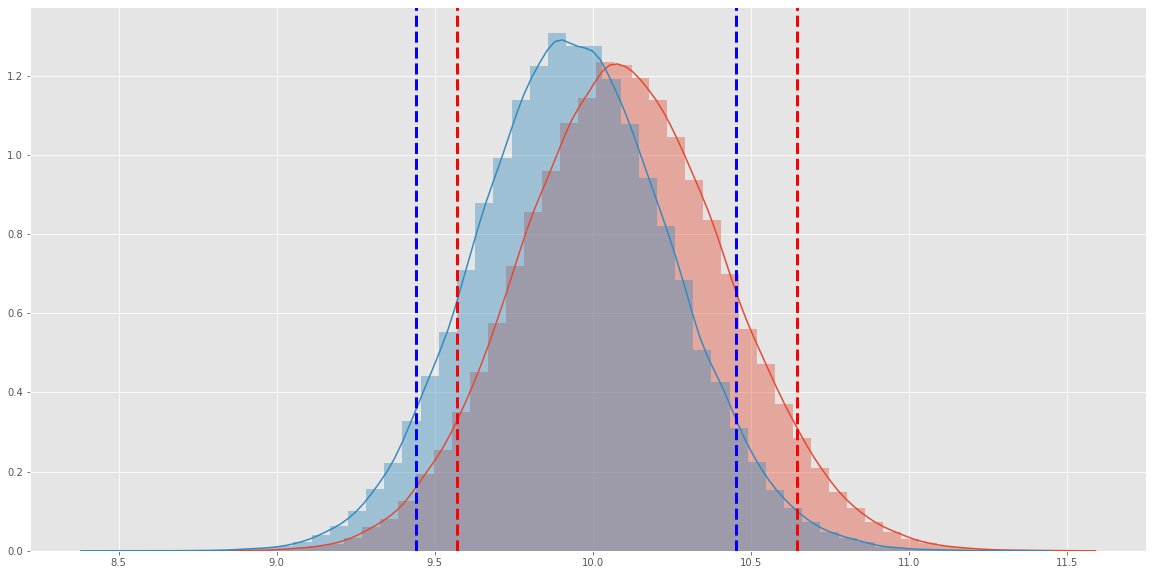

In [0]:
sns.distplot(bootmean_A,label='A');
sns.distplot(bootmean_B,label='B');
plt.axvline(x = a_q5, linewidth = 3, color = 'r', linestyle = '--');
plt.axvline(x = a_q95, linewidth = 3, color = 'r', linestyle = '--');
plt.axvline(x = b_q5, linewidth = 3, color = 'b', linestyle = '--');
plt.axvline(x = b_q95, linewidth = 3, color = 'b', linestyle = '--');

Вывод сделать просто — мы получим две плотности вероятности для каждой ветки эксперимента и сможем сравнивать, как пересекаются эти плотности. Если у нас перекрываются 0.5 и 0.95 квантили, значит нет статистически значимой разницы. Но не будем мелочиться и посчитаем p-value.

In [0]:
p_value = np.sum(np.mean(group_A.metrics.values)  - np.mean(group_B.metrics.values) <= np.abs(np.array(bootmean_A) - np.array(bootmean_B)))/boot

0.74307

Получили значение больше, чем 0.05, что означает, что нет  статистически значимой разницы

Кстати, можно было еще применить данную библиотеку для бутстрапа:  https://github.com/facebookincubator/bootstrapped

# **Задание 4**

Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [0]:
!wget -O test_4.csv https://drive.google.com/u/0/uc?id=1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW&export=download

--2020-04-08 18:08:31--  https://drive.google.com/u/0/uc?id=1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.139, 172.217.203.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jo69ont38c8hesgjo4pl2l99dqvouclb/1586369250000/08786162772281847194/*/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW [following]
--2020-04-08 18:08:32--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jo69ont38c8hesgjo4pl2l99dqvouclb/1586369250000/08786162772281847194/*/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.co

In [0]:
import pandas as pd
test_4 = pd.read_csv("test_4.csv", delimiter=";", index_col=0)
test_4

,metrics
1,1
2,1
3,4
4,1
5,1
...,...
306835,8
306836,11
306837,1
306838,81


[Статья](https://www.thinkwithgoogle.com/intl/ru-ru/products-tools/analytical-tools/money-and-ab-tests/)

Как стабилизировать данные, чтобы было проще сравнить средние при помощи критерия? Почистить данные.

Можем убрать все значения, которые выходят за N стандартных отклонений от среднего и воспринимать их как выбросы. Отрезав эти выбросы, мы стабилизируем выборку, что позволит проще посчитать метрики.

In [0]:
test_4.metrics.var()

511.99823268544515

Первая мысль: уберем возможные "выбросы". Для этого найдем 99-квантиль и оставим все значения, которые меньше этого значения

In [0]:
q_099 = mquantiles(test_4["metrics"], [0.99])
first_df = test_4[test_4["metrics"] <= q_099[0]]

Найдем дисперсию

In [0]:
first_df.metrics.var()

279.8730552637073

Уменьшили почти в два раза, но может произойти такое, что мы убрали важных для нас покупателей, что нивелирует пользу от уменьшения дисперсии таким способом

Тогда используем трансформацию Бокса-Кокса.

In [0]:
box_cox_metrics, _= st.boxcox(test_4.metrics)

In [0]:
box_cox_metrics.var()

0.43416179602413135

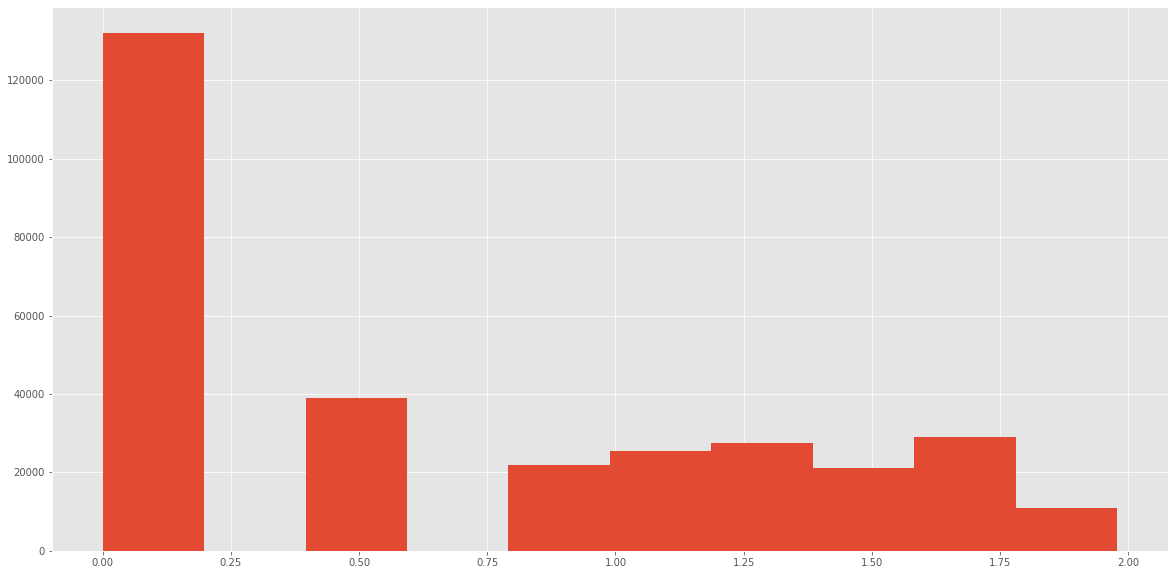

In [0]:
plt.hist(box_cox_metrics);

Дисперсия уменьшена! Но стоит помнить, что иметь дела мы теперь будем 

$$y = \begin{cases} 
\frac{(x^\lambda - 1)}{\lambda}, &  \lambda > 0\\ 
log(x), & \lambda = 0 
\end{cases}$$

с такими данными, поэтому после эксперимента мы должны будем вернуть изначальную величину


----
Также мы можем воспользуемся децильным  [методом уменьшении дисперсии](https://medium.com/statistics-experiments/децильный-метод-или-сокращение-дисперсии-c06758059727). Каждому значению присвоем номер децили, которой оно соответствует.

In [0]:
test_4["rank_first"] = test_4["metrics"].rank(method='first')
deciles = pd.qcut(test_4.rank_first, 10)
test_4['decile'] = deciles.values.codes

In [0]:
test_4[["metrics", "decile"]].groupby("decile").var()

,metrics
decile,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.211297
5,0.245055
6,0.515647
7,2.342361
8,26.897273


---
Что-то пошло не так.

---
Можно еще попробовать бакетирование, но не уверен, что работает правильно. Так что на этом задание всё. 

In [0]:
number_of_bucket = 1000

In [0]:
test_4["bucket"] = np.random.randint(0, number_of_bucket, size = len(test_4))

In [0]:
test_4

,metrics,rank_first,decile,bucket
1,1,1.0,0,131
2,1,2.0,0,708
3,4,192824.0,6,511
4,1,3.0,0,177
5,1,4.0,0,333
...,...,...,...,...
306835,8,237805.0,7,596
306836,11,248950.0,8,632
306837,1,132040.0,4,524
306838,81,300027.0,9,942


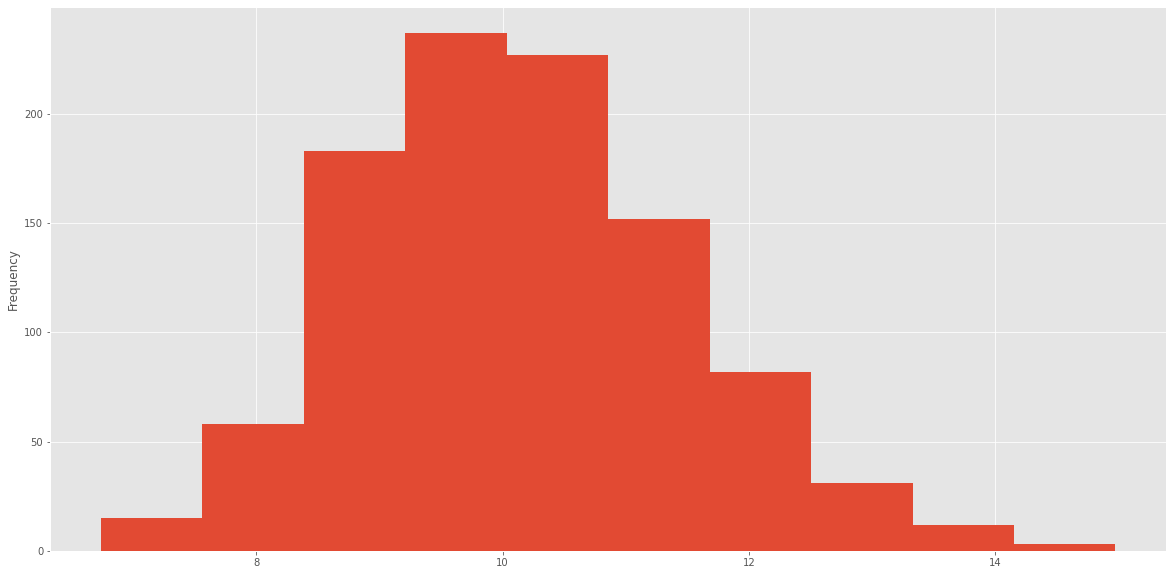

In [0]:
test_4.groupby(["bucket"]).mean()["metrics"].plot(kind='hist');

# **Задание 5**

Есть эксперимент с поисковыми подсказками. Вы хотим узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action - количество кликов
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [0]:
!wget -O test_5.csv https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv

--2020-04-08 17:35:06--  https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fdki267uilkfq7l/task5.csv [following]
--2020-04-08 17:35:06--  https://www.dropbox.com/s/raw/fdki267uilkfq7l/task5.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf4da25b527114f32453083a77d.dl.dropboxusercontent.com/cd/0/inline/A1eRoWRhbcS2cM1XqYEslr6EXeyTuVeWeGlXInJcKh2WVauxxi8ViPleu9yIheZxZX1dO9E4pGmEs50aUwZ6_dZ3kLmjpikGiFADNBE7cP4d06mAnqN3IDNhJKZ4fgk_los/file# [following]
--2020-04-08 17:35:06--  https://ucf4da25b527114f32453083a77d.dl.dropboxusercontent.com/cd/0/inline/A1eRoWRhbcS2cM1XqYEslr6EXeyTuVeWeGlXInJcKh2WVauxxi8ViPleu9yIheZxZX1dO9E4pGmEs50aUwZ6_dZ3kLmjpikGiFADNBE7cP4d06mAnqN3IDNhJKZ

Посмотрим на определение CTR. CTR - это показатель кликабельности. Это процент людей, которые нажимают на вашу рекламу. Его выражают через отношение количество кликов на количество просмотров, т.е. это пропорция. Применим [z-test](https://www.statisticshowto.com/z-test/) для двух пропорций.



$H_0$ для теста состоит в том, что пропорции одинаковы.

$H_A$ состоит в том, что пропорции не совпадают.

In [0]:
test_5 = pd.read_csv("test_5.csv")
test_5

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1
...,...,...,...,...
8186,7706713,B,1,1
8187,7875223,B,1,1
8188,4617329,B,9,4
8189,5394863,B,5,1


Можно использовать Id для бакетирования, но мы посмотрим значения z-статистики для пропорции

In [0]:
group_A_5 = test_5[test_5.variant == "A"]
group_B_5 = test_5[test_5.variant == "B"]

In [0]:
group_data = test_5.groupby("variant")[["view", "action"]].sum()
group_data

,view,action
variant,,
A,20303,12369
B,15883,9627


Используем z-test для пропорций

In [0]:
conversions = group_data["action"].values
clicks = group_data["view"].values

In [0]:
from statsmodels.stats.proportion import proportions_ztest

zscore, pvalue = proportions_ztest(conversions, clicks, alternative = 'two-sided')
print('zscore = {:.4f}, pvalue = {:.4f}'.format(zscore, pvalue))

zscore = 0.5995, pvalue = 0.5488


In [0]:
p_1 = group_data['action']["A"]/group_data['view']["A"]
p_2 = group_data['action']["B"]/group_data['view']["B"]
p = (group_data['action']["A"]+group_data['action']["B"])/(group_data['view']["A"]+group_data['view']["B"])

z_static_obs = (p_1 - p_2)/np.sqrt(p * (1-p) * (1/group_data['view']["A"] + 1/group_data['view']["B"]))

In [0]:
z_static_obs

0.5995066080068987

В результате p-value= 0.5488 > alpha=0.05 и мы не можем отклонить H0, что означает, что высокий CTR, наблюдаемый в экспериментальной группе, обусловлен  случайностью. Рекомендация для маркетинговой команды / команды продуктов заключается в том, чтобы не развертывать этот новый план/изменения.

In [0]:
def bootstrap_for_proportion(action_a, action_b, view_a, view_b, size_a, size_b, boot = 100000):
    """
    https://www.statisticshowto.com/z-test/
    """
    z_statistics = []
    for _ in range(boot):
        
        bootsample_action_A = np.random.choice(action_a, size=size_a, replace=True)
        bootsample_action_B = np.random.choice(action_b, size=size_b, replace=True)

        bootsample_view_A = np.random.choice(view_a, size=size_a, replace=True)
        bootsample_view_B = np.random.choice(view_b, size=size_b, replace=True)

        boot_action_a = np.sum(bootsample_action_A)
        boot_action_b = np.sum(bootsample_action_B)

        boot_view_a = np.sum(bootsample_view_A)
        boot_view_b = np.sum(bootsample_view_B)

        p_1 = boot_action_a/boot_view_a
        p_2 = boot_action_b/boot_view_b

        p = (boot_action_a + boot_action_b)/(boot_view_a + boot_view_b)

        z_statistic = (p_1 - p_2)/np.sqrt(p * (1-p) * (1/boot_view_a + 1/boot_view_b))
        #print(p_1, p_2, p, z_statistic, np.sqrt(p * (1-p) * (1/size_a + 1/size_b)))
        z_statistics.append(z_statistic)
    return np.array(z_statistics)

In [0]:
boot = 100000
z_statistics_bootstrap = bootstrap_for_proportion(group_A_5.action.values, group_B_5.action.values, \
                                                  group_A_5.view.values, group_B_5.view.values, len(group_A_5), len(group_B_5), boot)

In [0]:
pvalue = np.sum(z_statistics_bootstrap >= z_static_obs)/boot
pvalue

0.49996

Заметим, что p_value ниже, чем в proportions_ztest, но при этом мы все еще не можем отклонить $H_0$